#Dependencies

In [12]:
# !pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python

# Library import

In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

In [2]:
from  tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer , Conv2D,Dense,MaxPooling2D,Input,Flatten

2024-02-03 17:14:47.451977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 17:14:47.452008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 17:14:47.452911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 17:14:47.458360: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 17:14:48.220472: W tensorflow/compiler/tf2

In [3]:
import tensorflow as tf

In [4]:
# Model(inputs=[inputimage,verificationimage],outputs=[1,0])


# Limiting memory use by GPU

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

2024-02-03 17:14:55.203142: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 17:14:55.235503: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 17:14:55.235734: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
# os.mkdir('data')

FileExistsError: [Errno 17] File exists: 'data'

In [6]:
pospath  = 'data/positive'
negpath  = 'data/negative'
ancpath  = 'data/anchor'


In [ ]:

# os.mkdir(pospath)
# os.mkdir(negpath)
# os.mkdir(ancpath)

In [ ]:
# !wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2024-02-03 14:01:10--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  1.34MB/s    in 7m 49s  

2024-02-03 14:09:01 (376 KB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [ ]:
# !tar -xf lfw.tgz

In [ ]:
# for dir in os.listdir('lfw'):

#      for img in os.listdir(os.path.join('lfw',dir)):
#           cpath  = os.path.join('lfw',dir,img)
#           newpath  = os.path.join(negpath,img)
#           os.replace(cpath,newpath)


In [ ]:
# ancpath=os.path.join(os.curdir,ancpath)

In [7]:
anchor = tf.data.Dataset.list_files(ancpath + '/*.jpg').take(300)
positive= tf.data.Dataset.list_files(pospath+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(negpath+'/*.jpg').take(300)


2024-02-03 17:15:05.048481: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 17:15:05.048786: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 17:15:05.048918: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

# Preprocessing

In [8]:
def preprocessing(file_path):

    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img,(100,100))
    img = img /255.0
    return img


In [9]:
positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

In [10]:
data = positives.concatenate(negatives)

In [11]:
exampl = data.as_numpy_iterator()

In [12]:
def preprocessing_twins(inputimg,validimg,label):
    return( preprocessing(inputimg),preprocessing(validimg),label)

## example for whats happening

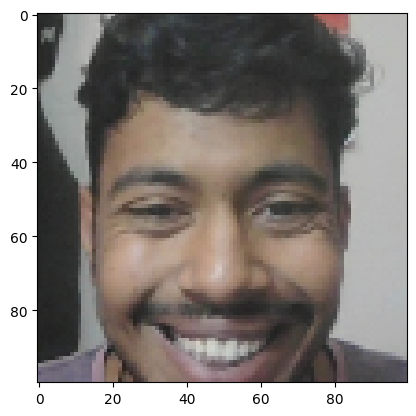

In [13]:
plt.imshow(preprocessing_twins(*exampl.next())[0])

In [14]:
data = data.map(preprocessing_twins)
data = data.cache()

# shuffling dataset so that we get mixed set of samples
data = data.shuffle(buffer_size=1024)

In [15]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [16]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [17]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)


# SIASME

In [18]:
def embedder():
    inp = Input(shape=(100,100,3),name='input_image')
    #first block
    L1 = Conv2D(64,(10,10),activation='relu')(inp)
    L2 = MaxPooling2D(64,(2,2),padding = 'same')(L1)
    #second block
    L3 = Conv2D(128,(7,7),activation='relu')(L2)
    L4 = MaxPooling2D(64,(2,2),padding = 'same')(L3)
    #third block
    L5 = Conv2D(128,(4,4),activation='relu')(L4)
    L6 = MaxPooling2D(64,(2,2),padding = 'same')(L5)
    #final block
    L7 = Conv2D(256,(4,4),activation='relu')(L6)
    f1 = Flatten()(L7)
    d1 = Dense(4096,activation='sigmoid')(f1)

    return Model(inputs=[inp],outputs=[d1],name='embedding')
     

In [19]:
embedding = embedder()

## Building distance layer

In [20]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()

    def call(self,input_embedding,validation_embedding):
        return tf.math.abs(input_embedding-validation_embedding)

In [21]:
def make_siamese_model():

    input_image  = Input(name = 'input_img',shape = (100,100,3))

    validation_image = Input(name ='validation_img',shape=(100,100,3))

    siamese_layer = L1Dist()
    siamese_layer._name ='distance'
    distances = siamese_layer(embedding(input_image),embedding(validation_image))

    #classification layer
    classifier = Dense(1,activation='sigmoid')(distances)

    return Model(inputs=[input_image,validation_image],outputs = classifier, name = 'SiasmeNet')

In [22]:
siamese_model = make_siamese_model()

# Training Function

In [23]:
binary_cross_loss = tf.losses.BinaryCrossentropy()


In [24]:
opt = tf.keras.optimizers.Adam(1e-4)


In [25]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint= tf.train.Checkpoint(opt=opt,siamese_model=siamese)

## Train step function

In [26]:
@tf.function
def train_step(batch):
    with tf.GradientTape() as tape:
         
         X = batch[:2]
         y = batch[2]

         yhat = siamese_model(X,training = True)

         loss = binary_cross_loss(y,yhat)

    # print(loss)

    grad = tape.gradient(loss, siamese_model.trainable_variables)

    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))

    return loss

## Training Loop


In [27]:
def train(data,EPOCHS):

    for epoch in range(1,EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch,EPOCHS))

        progbar = tf.keras.utils.Progbar(len(train_data))


        for idx , batch in enumerate(train_data):

            train_step(batch)
            progbar.update(idx+1)
        
        if epoch%10 ==0:
            checkpoint.save(file_prefix=checkpoint_prefix)



## Training the model

In [28]:
EPOCHS =50

In [29]:
train(train_data,EPOCHS)


 Epoch 1/50


2024-02-03 17:15:07.260797: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-03 17:15:07.357645: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


2024-02-03 17:15:10.750473: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f4f672c23c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-03 17:15:10.750506: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-03 17:15:10.754911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706960710.847519   42080 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


27/27 [==============================] - 17s 395ms/step

 Epoch 2/50
27/27 [==============================] - 9s 352ms/step

 Epoch 3/50
27/27 [==============================] - 9s 355ms/step

 Epoch 4/50
27/27 [==============================] - 9s 357ms/step

 Epoch 5/50
27/27 [==============================] - 9s 353ms/step

 Epoch 6/50
27/27 [==============================] - 9s 352ms/step

 Epoch 7/50
27/27 [==============================] - 9s 346ms/step

 Epoch 8/50
27/27 [==============================] - 9s 339ms/step

 Epoch 9/50
27/27 [==============================] - 9s 335ms/step

 Epoch 10/50
27/27 [==============================] - 9s 334ms/step


2024-02-03 17:16:45.631096: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2024-02-03 17:16:45.692130: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2024-02-03 17:16:45.768818: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.



 Epoch 11/50
27/27 [==============================] - 9s 336ms/step

 Epoch 12/50
27/27 [==============================] - 9s 330ms/step

 Epoch 13/50
27/27 [==============================] - 9s 331ms/step

 Epoch 14/50
27/27 [==============================] - 9s 335ms/step

 Epoch 15/50
27/27 [==============================] - 9s 334ms/step

 Epoch 16/50
27/27 [==============================] - 9s 326ms/step

 Epoch 17/50
27/27 [==============================] - 9s 330ms/step

 Epoch 18/50
27/27 [==============================] - 9s 329ms/step

 Epoch 19/50
27/27 [==============================] - 9s 325ms/step

 Epoch 20/50
27/27 [==============================] - 9s 325ms/step


2024-02-03 17:18:16.064745: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.
2024-02-03 17:18:16.125765: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150994944 exceeds 10% of free system memory.



 Epoch 21/50
27/27 [==============================] - 9s 328ms/step

 Epoch 22/50
27/27 [==============================] - 9s 324ms/step

 Epoch 23/50
27/27 [==============================] - 9s 325ms/step

 Epoch 24/50
27/27 [==============================] - 9s 324ms/step

 Epoch 25/50
27/27 [==============================] - 9s 326ms/step

 Epoch 26/50
27/27 [==============================] - 9s 324ms/step

 Epoch 27/50
27/27 [==============================] - 8s 321ms/step

 Epoch 28/50
27/27 [==============================] - 8s 322ms/step

 Epoch 29/50
27/27 [==============================] - 8s 317ms/step

 Epoch 30/50
27/27 [==============================] - 8s 318ms/step

 Epoch 31/50
27/27 [==============================] - 8s 321ms/step

 Epoch 32/50
27/27 [==============================] - 8s 321ms/step

 Epoch 33/50
27/27 [==============================] - 9s 323ms/step

 Epoch 34/50
27/27 [==============================] - 8s 322ms/step

 Epoch 35/50
27/27 [=============

# Evaluating 

In [30]:
from keras.metrics import Precision, Recall

In [31]:
test_input,test_val,y_true = test_data.as_numpy_iterator().next()


### Making Prediction 

In [32]:
y_hat  = siamese_model.predict([test_input,test_val])
y_hat

1/1 [==============================] - 0s 135ms/step


array([[2.2651203e-07],
       [1.0000000e+00],
       [4.2829480e-11],
       [1.0000000e+00],
       [5.6340365e-08],
       [9.9999189e-01],
       [2.6181659e-09],
       [9.9963009e-01],
       [9.9999988e-01],
       [1.0688618e-09],
       [1.0273543e-08],
       [5.8250225e-07],
       [4.3340689e-05],
       [1.0000000e+00],
       [9.9999201e-01],
       [1.0000000e+00]], dtype=float32)

In [33]:
[1 if prediction >0.5 else 0 for prediction in y_hat] # postprocessing results

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]

In [34]:
m = Recall()
m.update_state(y_true,y_hat)
m.result().numpy()

1.0

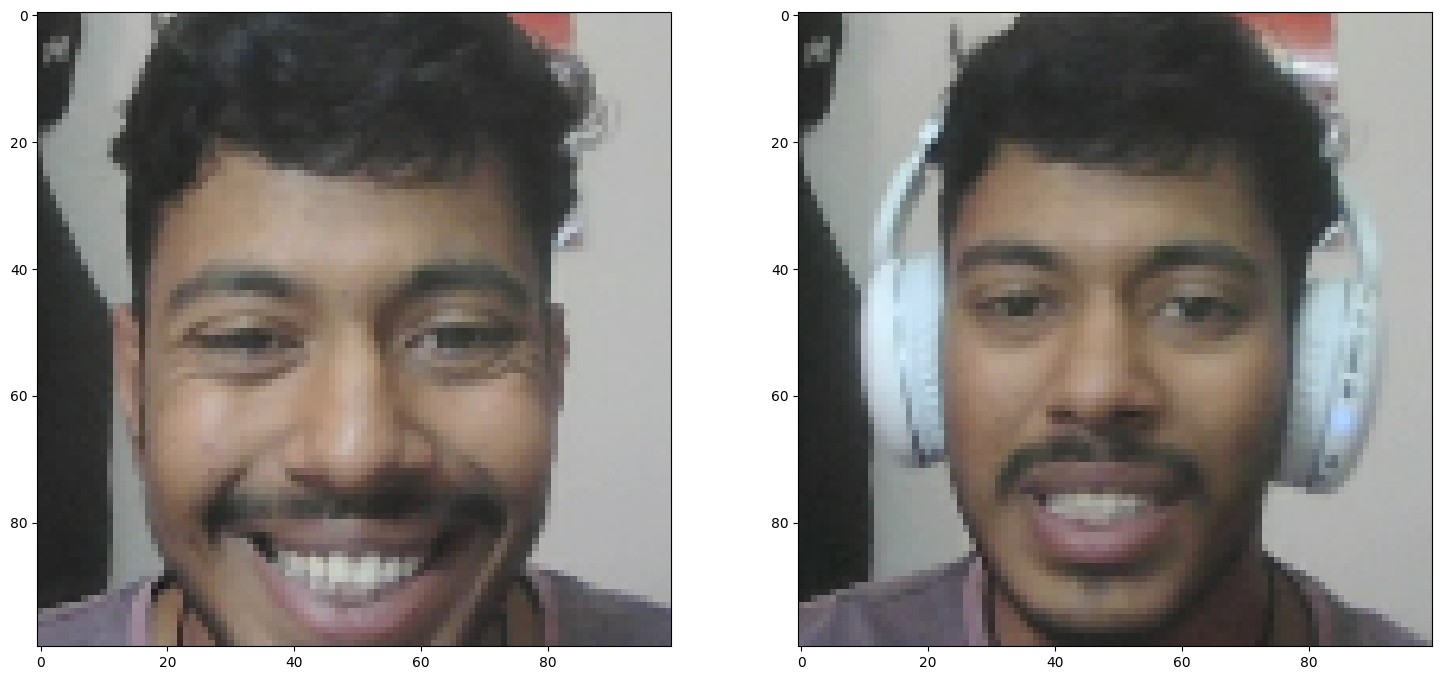

In [35]:
plt.figure(figsize=(18,18))
plt.subplot(1,2,1)
plt.imshow(test_input[3])
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()

# saving model

In [36]:
siamese_model.save('siamesemodel.h5')

/home/itachi/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
model = tf.keras.models.load_model('siamesemodel.h5', custom_objects ={'L1Dist':L1Dist,'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [38]:
model.predict([test_input,test_val])

1/1 [==============================] - 0s 93ms/step


array([[2.2651203e-07],
       [1.0000000e+00],
       [4.2829480e-11],
       [1.0000000e+00],
       [5.6340365e-08],
       [9.9999189e-01],
       [2.6181659e-09],
       [9.9963009e-01],
       [9.9999988e-01],
       [1.0688618e-09],
       [1.0273543e-08],
       [5.8250225e-07],
       [4.3340689e-05],
       [1.0000000e+00],
       [9.9999201e-01],
       [1.0000000e+00]], dtype=float32)

# Real Time test

### Verification Function

In [39]:
def verify( model,detectthresh,verifthresh):

    results=[]


    for img in os.listdir('verification'):
        input_img = preprocessing('inputimage/input_image.jpg')
        validation_img = preprocessing(os.path.join('verification',img ))

        
        result = model.predict(list(np.expand_dims([input_img,validation_img],axis=1)))
        print(result)
        results.append(result)

    detection = np.sum(np.array(results)>detectthresh)

    verification = detection/len(os.listdir('verification'))

    verified = verification>verifthresh

    return results , verified
                                       

In [40]:
_,verifyid = verify(model,0.5,0.5)

1/1 [==============================] - 1s 619ms/step
[[0.28447956]]
1/1 [==============================] - 0s 14ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[0.6548714]]
1/1 [==============================] - 0s 15ms/step
[[0.930184]]
1/1 [==============================] - 0s 14ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[0.4780879]]
1/1 [==============================] - 0s 15ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[1.]]
1/1 [==============================] - 0s 16ms/step
[[0.6831931]]
1/1 [==============================] - 0s 16ms/step
[[1.]]
1/1 [==============================] - 0s 16ms/step
[[0.6460762]]
1/1 [==============================] - 0s 14ms/step
[[1.]]
1/1 [==============================] - 0s 13ms/step
[[0.7111944]]
1/1 [==============================] - 0s 14ms/step
[[0.9854424]]
1/1 [==============================] - 0s 18ms/step
[[0.89

In [41]:
verifyid

True

In [42]:
cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret,frame = cap.read()
    frame=frame[170:170+250,190:190+250]
    
    cv2.imshow('verification',frame)

    if cv2.waitKey(1) & 0XFF == ord('v'):
        cv2.imwrite('inputimage/input_image.jpg',frame)

        results,verified = verify(model,0.5,0.5)
        print(verified)
        

    if cv2.waitKey(1) & 0XFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
[[0.99562824]]
1/1 [==============================] - 0s 17ms/step
[[1.]]
1/1 [==============================] - 0s 15ms/step
[[0.9987159]]
1/1 [==============================] - 0s 15ms/step
[[0.9639838]]
1/1 [==============================] - 0s 15ms/step
[[0.9999999]]
1/1 [==============================] - 0s 15ms/step
[[0.514726]]
1/1 [==============================] - 0s 14ms/step
[[0.99830735]]
1/1 [==============================] - 0s 14ms/step
[[0.6263847]]
1/1 [==============================] - 0s 15ms/step
[[1.]]
1/1 [==============================] - 0s 14ms/step
[[0.99231005]]
1/1 [==============================] - 0s 15ms/step
[[0.15906851]]
1/1 [==============================] - 0s 15ms/step
[[0.99862015]]
1/1 [==============================] - 0s 15ms/step
[[0.5464824]]
1/1 [==============================] - 0s 14ms/step
[[0.99572754]]
1/1 [==============================] - 0s 15ms/step
[[0.9232176]]
1/1 [==============